**First of all, we import all the necessary libraries required for the task.**

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.cluster import KMeans
from skimage.color import rgb2lab, deltaE_cie76

**Reading image**

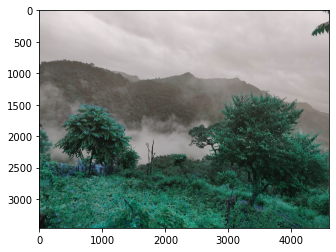

In [ ]:
image = cv2.imread('sample_image.jpg')
plt.imshow(image)
plt.show()

**Knowing the type and shape of image**

In [ ]:
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))

The type of this input is <class 'numpy.ndarray'>
Shape: (3456, 4608, 3)


*   In the above image the colours have changes since OpenCV reads 
the image in BGR format .Thus we have to change the image format form BGR to RGB.







**Converting BGR image to RGB**

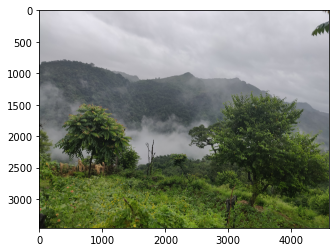

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()


**Converting image into Grayscale**

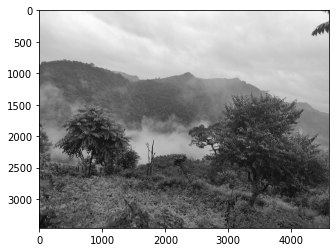

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.show()

The input images can be of different dimensions. Thus we decide a common dimension for each image

**Resizing the image**

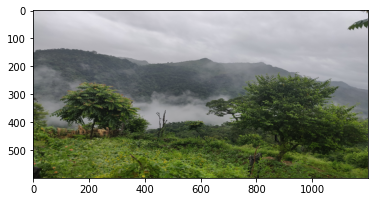

In [ ]:

resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)
plt.show()

**Function to return hex values of colours that we are going to identify, i.e Red, Green and Blue**

In [ ]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

**Defining method for getting images & Conversion from BGR-TO-RGB**

In [ ]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

**K-means clustering method**

First we to resize the images into one common dimension and then convert it into an array because KMeans expects flattened array as input during its fit method.

In [ ]:
def get_colors(image, number_of_colors, show_chart): 
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

**Calling Above Two Functions**

[array([54.25966422, 67.01514608, 33.96498775]),
 array([179.78300123, 180.35589508, 186.8108072 ]),
 array([84.24386676, 91.08496775, 92.36726281]),
 array([206.76034888, 206.45446035, 213.92752928]),
 array([109.41026716, 125.06325626,  56.0985384 ]),
 array([77.95881286, 95.56399526, 38.54920834]),
 array([121.27491781, 125.8279114 , 125.57873334]),
 array([30.10091674, 38.51244153, 21.10458372])]

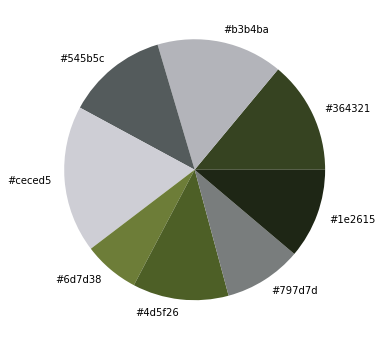

In [ ]:
get_colors(get_image('sample_image.jpg'), 8, True)

**Search images using Color**

Using above model we have extracted thr major colours. Thus we can now search images based on these major colours. We can select a colour and the image whose hex value is close to that of this coulour's hex than that particular colour is detected. We first get all the images and store them in the "images" variable

In [ ]:
IMAGE_DIRECTORY = 'images'

COLORS = {'GREEN': [0, 128, 0],'BLUE': [0, 0, 128],'YELLOW': [255, 255, 0]}

images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

**Plotting the data images**

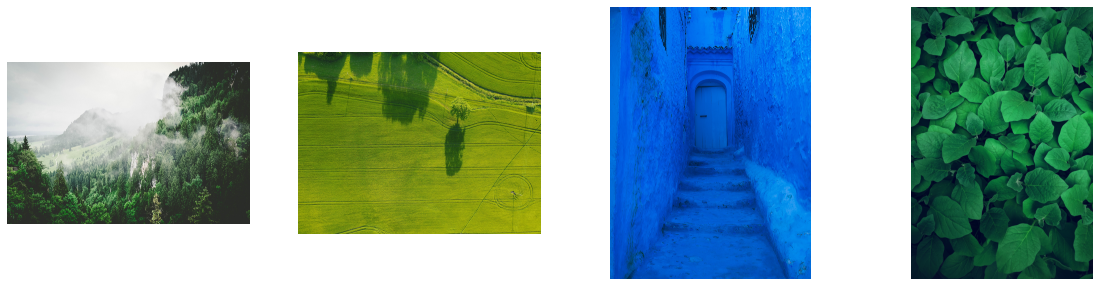

In [ ]:
plt.figure(figsize=(20, 5))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])
    plt.axis('off')

**Match Images with Colours**

Filter all images that match the selected color

In [ ]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    
    for i in range(number_of_colors):
        
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        
        if (diff < threshold):
            select_image = True
    
    return select_image

In [ ]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            plt.axis('off')
            index += 1

**Search for green**

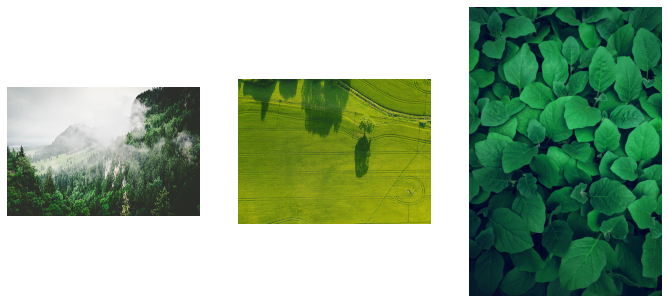

In [ ]:
plt.figure(figsize = (20, 8))
show_selected_images(images, COLORS['GREEN'], 60, 5)

**Search for Blue**

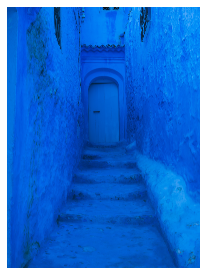

In [ ]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)

**Search for Yellow**

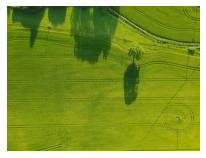

In [ ]:

plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)